<a href="https://colab.research.google.com/github/kacunha/Data-Science-Projects/blob/master/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - ENEM (2020)

<center><img alt="Analisando ENEM" width="40%" src="https://logodownload.org/wp-content/uploads/2015/02/enem-logo-1.jpg"></center>

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior.



## Obtenção dos Dados

Nesse projeto iremos utilizar a base de dados de 2020 (última disponibilizada) através :
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados

In [ ]:
#criação de diretório no Google Drive
!mkdir -p "/content/drive/MyDrive/Colab_Datasets/Enem"

In [85]:
#download dos microdados direto do site para pasta criada
!wget -P "/content/drive/MyDrive/Colab_Datasets/Enem" https://download.inep.gov.br/microdados/microdados_enem_2020.zip

--2022-03-02 16:06:46--  https://download.inep.gov.br/microdados/microdados_enem_2020.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620776982 (592M) [application/zip]
Saving to: ‘/content/drive/MyDrive/Colab_Datasets/Enem/microdados_enem_2020.zip.6’

microdados_enem_202 100%[===================>] 592.02M   728KB/s    in 12m 49s 

2022-03-02 16:19:36 (789 KB/s) - ‘/content/drive/MyDrive/Colab_Datasets/Enem/microdados_enem_2020.zip.6’ saved [620776982/620776982]



In [2]:
#importar os pacotes necessários
import pandas as pd
import zipfile
import matplotlib.pyplot as plt


In [3]:
#descompactando o arquivo e exibindo lista de arquivos dentro do zip
with zipfile.ZipFile('/content/drive/MyDrive/Colab_Datasets/Enem/microdados_enem_2020.zip') as z:
    print(*z.namelist(),sep="\n")

DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2020.ods
DICION╡RIO/Dicionário_Microdados_Enem_2020.xlsx
INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2020.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2020.R
INPUTS/INPUT_SAS_ITENS_PROVA_2020.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2020.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2020.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2020.sps
LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_Enem_2020_Digital.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_Enem_2020_Impresso.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2020.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2020.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2020_DIGITAL_CAD_01_DIA_1_AZUL_ESPANHOL.pdf
PROVAS E GABARITOS/ENEM_2020_DIGITAL_CAD_01_DIA_1_AZUL_INGLES.pdf
PROVAS E GABARITOS/ENEM_2020_DIGITAL_CAD_02_DIA_1_AMARELO_ ESPANHOL.pdf
PROVAS E GABARITOS/ENEM_2020_DIGITAL_CAD_02_DIA_1_AMARELO_INGLES.pdf
PROVAS E GABARITOS/ENEM_2020_DIG

In [4]:
#importar o arquivo para um DataFrame
with zipfile.ZipFile('/content/drive/MyDrive/Colab_Datasets/Enem/microdados_enem_2020.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2020.csv') as f:
        %time microdados_enem = pd.read_csv(f,sep=';',encoding='ISO-8859-1')

CPU times: user 1min 1s, sys: 24.1 s, total: 1min 25s
Wall time: 1min 26s


In [5]:
#mostrar as 5 primeiras entradas
microdados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.0,689.0,693.0,698.0,604.1,661.7,595.3,711.3,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,35.0,SP,3.0,1.0,1.0,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [6]:
#verificar o tamanho do dataframe (numero de linhas, numero de colunas)
microdados_enem.shape

(5783109, 76)

In [7]:
#tipos das variáveis 
display(microdados_enem.dtypes)

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

In [40]:
colunasSelecionadas = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO', 'SG_UF_PROVA', 'TP_SEXO', 
                       'Q001', 'Q002', 'Q006']

In [41]:
microdadosEnemSelecionado = microdados_enem.filter(items=colunasSelecionadas)

In [42]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_PROVA,TP_SEXO,Q001,Q002,Q006
0,200006271946,NaN,NaN,PA,F,NaN,NaN,NaN
1,200001195856,711.3,580.0,RN,M,NaN,NaN,NaN
2,200001943954,NaN,NaN,BA,F,B,C,B
3,200001908998,759.4,760.0,SP,M,NaN,NaN,NaN
4,200001634757,NaN,NaN,MG,F,B,G,B


In [43]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [44]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_PROVA,TP_SEXO,Q001,Q002,Q006
5,200003132410,526.7,700.0,RS,F,C,B,C
8,200006762554,448.5,600.0,PB,F,B,C,B
11,200006138472,546.5,640.0,BA,M,B,C,B
18,200003343448,420.3,800.0,AL,F,C,C,B
19,200005966328,405.6,500.0,PA,M,C,D,D


## Questionário Sócio Econômico
Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

Q006	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

In [45]:
q001e002Dicionario = {
'A': 'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [46]:
microdadosEnemSelecionado['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q001]

In [47]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_PROVA,TP_SEXO,Q001,Q002,Q006,NO_Q001
5,200003132410,526.7,700.0,RS,F,C,B,C,"Completou a 4ª série/5º ano, mas não completou..."
8,200006762554,448.5,600.0,PB,F,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...
11,200006138472,546.5,640.0,BA,M,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...
18,200003343448,420.3,800.0,AL,F,C,C,B,"Completou a 4ª série/5º ano, mas não completou..."
19,200005966328,405.6,500.0,PA,M,C,D,D,"Completou a 4ª série/5º ano, mas não completou..."


In [48]:
microdadosEnemSelecionado['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q002]

In [49]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_PROVA,TP_SEXO,Q001,Q002,Q006,NO_Q001,NO_Q002
5,200003132410,526.7,700.0,RS,F,C,B,C,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...
8,200006762554,448.5,600.0,PB,F,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
11,200006138472,546.5,640.0,BA,M,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
18,200003343448,420.3,800.0,AL,F,C,C,B,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
19,200005966328,405.6,500.0,PA,M,C,D,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...


 Distribuição dos candidatos do ENEM por escolaridade do Pai

In [50]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",736397
Não completou a 4ª série/5º ano do Ensino Fundamental,483323
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",352976
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",284175
"Completou a Faculdade, mas não completou a Pós-graduação",233881
Não sei,199727
Completou a Pós-graduação,157039
Nunca estudou,113786


Distribuição dos candidatos do ENEM  por escolaridade da mãe

In [51]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",881498
Não completou a 4ª série/5º ano do Ensino Fundamental,358276
"Completou a Faculdade, mas não completou a Pós-graduação",312436
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",306430
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",294949
Completou a Pós-graduação,275108
Nunca estudou,76337
Não sei,56270


In [52]:
# estatistica por escolaridade do pai
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT  ...       
                                                        count  ...    max
NO_Q001                                                        ...       
Completou a 4ª série/5º ano, mas não completou ...   352976.0  ...  975.0
Completou a 8ª série/9º ano do Ensino Fundament...   284175.0  ...  975.0
Completou a Faculdade, mas não completou a Pós-...   233881.0  ...  975.0
Completou a Pós-graduação                            157039.0  ...  975.0
Completou o Ensino Médio, mas não completou a F...   736397.0  ...  975.0
Nunca estudou                                        113786.0  ...  975.0
Não completou a 4ª série/5º ano do Ensino Funda...   483323.0  ...  975.0
Não sei                                              199727.0  ...  975.0

[8 rows x 8 columns]

In [53]:
# estatistica por escolaridade da mãe
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_MT  ...       
                                                        count  ...    max
NO_Q002                                                        ...       
Completou a 4ª série/5º ano, mas não completou ...   306430.0  ...  975.0
Completou a 8ª série/9º ano do Ensino Fundament...   294949.0  ...  975.0
Completou a Faculdade, mas não completou a Pós-...   312436.0  ...  975.0
Completou a Pós-graduação                            275108.0  ...  975.0
Completou o Ensino Médio, mas não completou a F...   881498.0  ...  975.0
Nunca estudou                                         76337.0  ...  963.6
Não completou a 4ª série/5º ano do Ensino Funda...   358276.0  ...  975.0
Não sei                                               56270.0  ...  975.0

[8 rows x 8 columns]

In [21]:
q006Dicionario = {
'A': 'Nenhuma Renda',
'B':'Até R$ 1.045,00',
'C':'De R$ 1.045,01 até R$ 1.567,50',
'D':'De R$ 1.567,51 até R$ 2.090,00',
'E':'De R$ 2.090,01 até R$ 2.612,50',
'F':'De R$ 2.612,51 até R$ 3.135,00',
'G':'De R$ 3.135,01 até R$ 4.180,00',
'H':'De R$ 4.180,01 até R$ 5.225,00',
'I':'De R$ 5.225,01 até R$ 6.270,00',
'J':'De R$ 6.270,01 até R$ 7.315,00',
'K':'De R$ 7.315,01 até R$ 8.360,00',
'L':'De R$ 8.360,01 até R$ 9.405,00',
'M':'De R$ 9.405,01 até R$ 10.450,00',
'N':'De R$ 10.450,01 até R$ 12.540,00',
'O':'De R$ 12.540,01 até R$ 15.675,00',
'P':'De R$ 15.675,01 até R$ 20.900,00',
'Q':'Acima de R$ 20.900,00'}

In [22]:
microdadosEnemSelecionado['NO_Q006'] = [q006Dicionario[resp] for resp in microdadosEnemSelecionado.Q006]

In [23]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,Q001,Q002,Q006,NO_Q001,NO_Q002,NO_Q006
5,200003132410,526.7,700.0,F,1,3,C,B,C,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...,"De R$ 1.045,01 até R$ 1.567,50"
8,200006762554,448.5,600.0,F,2,3,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou...","Até R$ 1.045,00"
11,200006138472,546.5,640.0,M,1,1,B,C,B,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou...","Até R$ 1.045,00"
18,200003343448,420.3,800.0,F,1,3,C,C,B,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...","Até R$ 1.045,00"
19,200005966328,405.6,500.0,M,1,2,C,D,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,"De R$ 1.567,51 até R$ 2.090,00"


In [55]:
coluna_sg_uf_residencia = microdadosEnemSelecionado ['SG_UF_PROVA']

In [57]:
#contagem por Estado
coluna_sg_uf_residencia.value_counts()

SP    376210
MG    254097
BA    206328
RJ    171140
CE    156908
PA    153485
PE    152309
MA    112721
RS    110667
PR    105178
GO     89032
PB     84662
PI     67303
RN     65450
SC     51771
DF     51586
AL     51082
AM     49273
ES     46007
SE     44189
MT     39238
MS     31903
TO     24568
RO     22513
AP     19302
AC     18197
RR      6185
Name: SG_UF_PROVA, dtype: int64

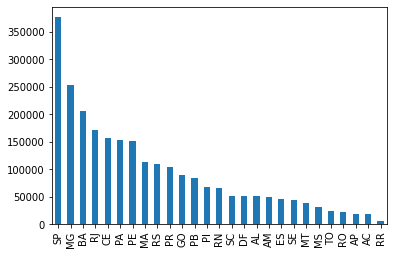

In [82]:
from IPython.core.pylabtools import figsize
coluna_sg_uf_residencia.value_counts().plot (kind='bar')